## Traffic Sign Classification
Name: Youssef Ayman Mohamed
<br>
RegNum: 211000348

## Glossary
1. [Import Libraries](#Import-Libraries)
<br>
3. [Dataset Validation](#dataset-validation)
<br>
3. [Visualisation](#visualisation)
<br>
4. [Model Building](#model-building)
<br>
5. [Evaluation](#Evaluation)
<br>





## Import Libraries

In [2]:
import numpy as np 
import pandas as pd 
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.utils import shuffle
from sklearn.metrics import classification_report, confusion_matrix

from keras.utils import to_categorical
from keras.models import Sequential, Model
from keras.layers import Dense, Conv2D, MaxPool2D, Flatten,Dropout, GlobalAveragePooling2D
from keras.applications import ResNet50



import chime
chime.notify_exceptions()

import os
for dirname, _, filenames in os.walk('../dataset'):
    for filename in filenames:
        print(os.path.join(dirname, filename) )

print(os.listdir('./dataset'))

['data0.pickle', 'data1.pickle', 'data2.pickle', 'data3.pickle', 'data4.pickle', 'data5.pickle', 'data6.pickle', 'data7.pickle', 'data8.pickle', 'datasets_preparing.py', 'kaggle.json', 'labels.pickle', 'label_names.csv', 'mean_image_gray.pickle', 'mean_image_rgb.pickle', 'std_gray.pickle', 'std_rgb.pickle', 'test.pickle', 'train.pickle', 'valid.pickle']


## Dataset validation

#### Loading Dataset

In [3]:
# path to the data
data = './dataset/'
TRAIN_LINK = data + "train.pickle"
VALID_LINK = data + "valid.pickle"
TEST_LINK = data + "test.pickle"

In [4]:
# load the traning data
with open(TRAIN_LINK, mode="rb") as f:
  train = pickle.load(f)

In [5]:
# load the Validating data
with open(VALID_LINK, mode="rb") as f:
  valid = pickle.load(f)

In [6]:
# load the Testing data
with open(TEST_LINK, mode="rb") as f:
  test = pickle.load(f)

In [7]:
# split the data into features and labels
trainX = train["features"]
trainY = train["labels"]
print (len(trainX))
print (len(trainY))



34799
34799


In [8]:
# split the data into features and labels
validX = valid["features"]
validY = valid["labels"]

In [9]:
# split the data into features and labels
trainX = trainX.astype("float") / 255.0
validX = validX.astype("float") / 255.0
print (len(trainX))
print (len(trainY))

34799
34799


In [10]:
# one hot encode the labels
trainY = to_categorical(trainY)
validY = to_categorical(validY)
validY.shape

(4410, 43)

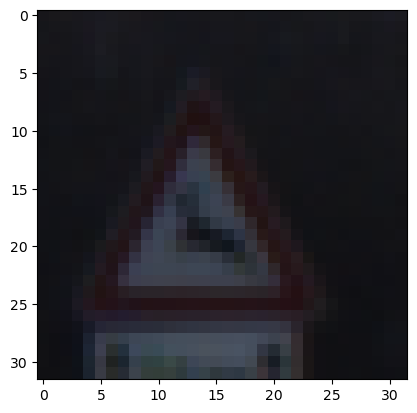

In [11]:
plt.imshow(trainX[250])

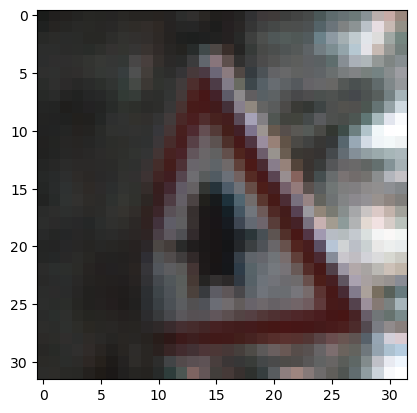

In [12]:
trainX, trainY = shuffle(trainX,trainY)
plt.imshow(trainX[0])

#### Data describing

In [13]:
# Display basic information about the loaded dataset
print("Number of training samples:", len(trainX))
print("Number of testing samples:", len(test["features"]))

Number of training samples: 34799
Number of testing samples: 12630


In [14]:
# Assuming trainX is a numpy array containing images
train_df = pd.DataFrame(trainX.reshape(len(trainX), -1), columns=[f'pixel_{i}' for i in range(trainX.shape[1]*trainX.shape[2]*trainX.shape[3])])

print(train_df.head())

    pixel_0   pixel_1   pixel_2   pixel_3   pixel_4   pixel_5   pixel_6  \
0  0.101961  0.109804  0.101961  0.129412  0.121569  0.117647  0.137255   
1  0.760784  0.262745  0.172549  0.768627  0.266667  0.172549  0.768627   
2  0.192157  0.211765  0.211765  0.164706  0.172549  0.172549  0.152941   
3  0.639216  0.631373  0.717647  0.674510  0.658824  0.760784  0.678431   
4  0.458824  0.368627  0.247059  0.435294  0.356863  0.227451  0.427451   

    pixel_7   pixel_8   pixel_9  ...  pixel_3062  pixel_3063  pixel_3064  \
0  0.129412  0.121569  0.141176  ...    0.631373    0.800000    0.831373   
1  0.270588  0.172549  0.760784  ...    0.988235    0.988235    0.960784   
2  0.156863  0.152941  0.149020  ...    0.274510    0.517647    0.462745   
3  0.650980  0.745098  0.670588  ...    0.129412    0.152941    0.133333   
4  0.364706  0.235294  0.415686  ...    0.309804    0.309804    0.309804   

   pixel_3065  pixel_3066  pixel_3067  pixel_3068  pixel_3069  pixel_3070  \
0    0.858824  

#### Statistics

In [15]:
# Basic data description
data_description = train_df.describe()


In [16]:
# Variance for each feature
variance_per_feature = train_df.var()
# Display data description
print("Data Description:")
print(data_description)
# Display variance per feature
print("\nVariance per feature:")
print(variance_per_feature)

Data Description:
            pixel_0       pixel_1       pixel_2       pixel_3       pixel_4  \
count  34799.000000  34799.000000  34799.000000  34799.000000  34799.000000   
mean       0.349708      0.343070      0.341810      0.350112      0.342987   
std        0.297408      0.298789      0.303379      0.296677      0.298538   
min        0.019608      0.015686      0.003922      0.019608      0.015686   
25%        0.121569      0.113725      0.113725      0.121569      0.113725   
50%        0.231373      0.219608      0.203922      0.231373      0.219608   
75%        0.501961      0.490196      0.498039      0.501961      0.490196   
max        1.000000      1.000000      1.000000      1.000000      1.000000   

            pixel_5       pixel_6       pixel_7       pixel_8       pixel_9  \
count  34799.000000  34799.000000  34799.000000  34799.000000  34799.000000   
mean       0.341745      0.351289      0.343619      0.342532      0.352605   
std        0.303336      0.297029

In [17]:
# mean and variance per channel
mean = np.mean(trainX, axis=(1, 2, 3))
variance = np.var(trainX, axis=(1, 2, 3))

# Display mean and variance per channel
print("Mean per channel:", mean)
print("Variance per channel:", variance)

Mean per channel: [0.30726614 0.49285386 0.31657093 ... 0.31841554 0.61884957 0.09145221]
Variance per channel: [0.03935964 0.06536212 0.02737361 ... 0.01803126 0.10731266 0.00187083]


In [18]:
# size of the images when flattened
flat_images = trainX.reshape(len(trainX), -1)

# Get the original image shape
# original_shape = trainX.shape[1:]

print("Shape of the flat image:", flat_images.shape) # (39209 images, 3072 num of pixeles of each image)

Shape of the flat image: (34799, 3072)


#### Correlations

In [19]:
correlation_matrix = np.corrcoef(flat_images, rowvar=False)

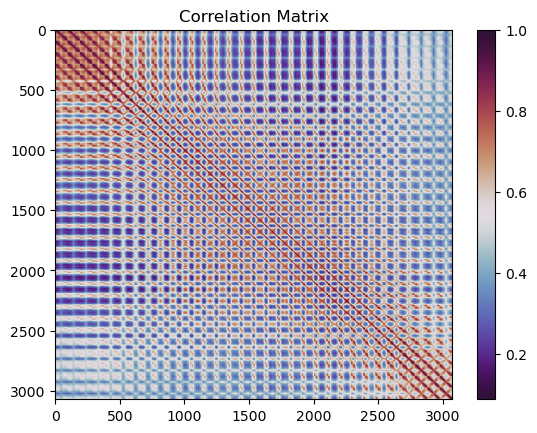

In [20]:
plt.imshow(correlation_matrix, cmap='twilight_shifted', aspect='auto')
plt.colorbar()
plt.title('Correlation Matrix')
plt.show()

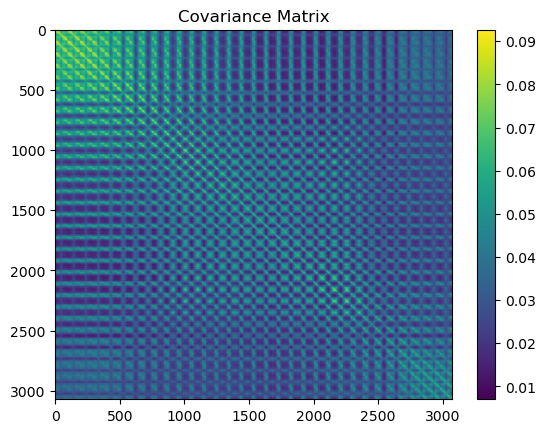

In [21]:
# Calculate the covariance matrix
covariance_matrix = np.cov(flat_images, rowvar=False)

# Visualize the covariance matrix
plt.imshow(covariance_matrix, cmap='viridis', aspect='auto')
plt.colorbar()
plt.title('Covariance Matrix')
plt.show()

#### Data Describing

In [22]:
# put the data into a dataframe for easy manipulation
train_df = pd.DataFrame(trainX.reshape(len(trainX), -1), columns=[f'pixel_{i}' for i in range(trainX.shape[1]*trainX.shape[2]*trainX.shape[3])])
data_description = train_df.describe()

# Display data description
print(data_description)

            pixel_0       pixel_1       pixel_2       pixel_3       pixel_4  \
count  34799.000000  34799.000000  34799.000000  34799.000000  34799.000000   
mean       0.349708      0.343070      0.341810      0.350112      0.342987   
std        0.297408      0.298789      0.303379      0.296677      0.298538   
min        0.019608      0.015686      0.003922      0.019608      0.015686   
25%        0.121569      0.113725      0.113725      0.121569      0.113725   
50%        0.231373      0.219608      0.203922      0.231373      0.219608   
75%        0.501961      0.490196      0.498039      0.501961      0.490196   
max        1.000000      1.000000      1.000000      1.000000      1.000000   

            pixel_5       pixel_6       pixel_7       pixel_8       pixel_9  \
count  34799.000000  34799.000000  34799.000000  34799.000000  34799.000000   
mean       0.341745      0.351289      0.343619      0.342532      0.352605   
std        0.303336      0.297029      0.298468    

## Visualisation

#### Univariate 

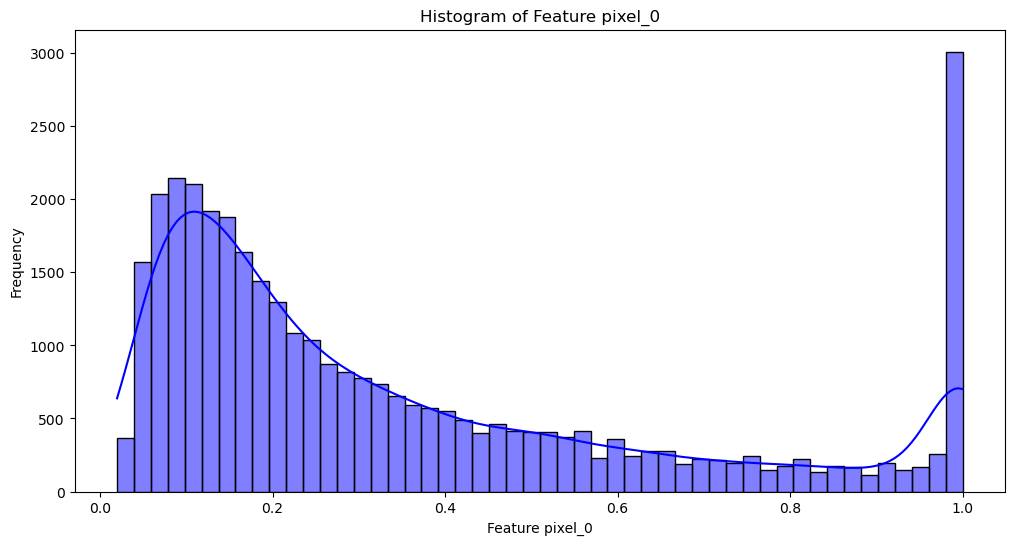

In [23]:
# Univariate Exploration: Histogram of a specific feature
plt.figure(figsize=(12, 6))
sns.histplot(train_df['pixel_0'], bins=50, kde=True, color='blue')
plt.title('Histogram of Feature pixel_0')
plt.xlabel('Feature pixel_0')
plt.ylabel('Frequency')
plt.show()



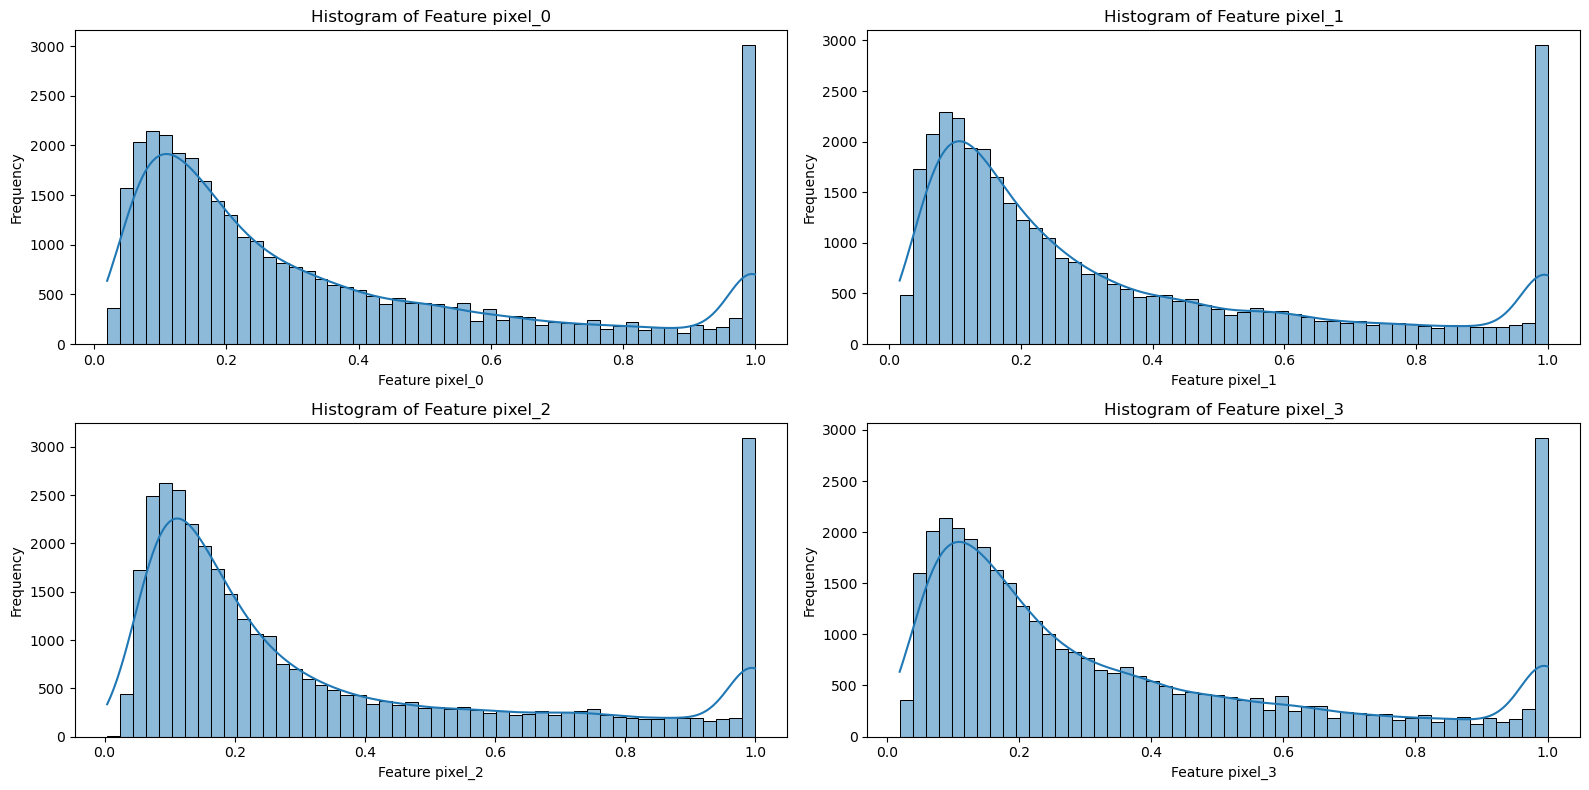

In [24]:
plt.figure(figsize=(16, 8))
for i in range(4):  # Assuming you want to plot histograms for the first four features
    plt.subplot(2, 2, i+1)
    sns.histplot(train_df[f'pixel_{i}'], bins=50, kde=True)
    plt.title(f'Histogram of Feature pixel_{i}')
    plt.xlabel(f'Feature pixel_{i}')
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

#### Bivariate

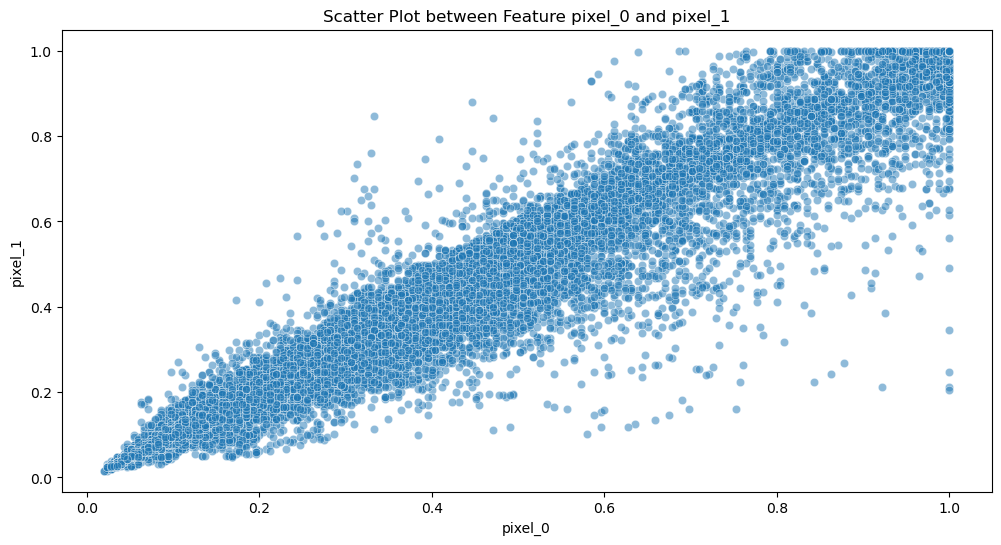

In [25]:
# Bivariate Exploration: Scatter plot between two features
plt.figure(figsize=(12, 6))
sns.scatterplot(x='pixel_0', y='pixel_1', data=train_df, alpha=0.5)
plt.title('Scatter Plot between Feature pixel_0 and pixel_1')
plt.show()

#### Multivariate

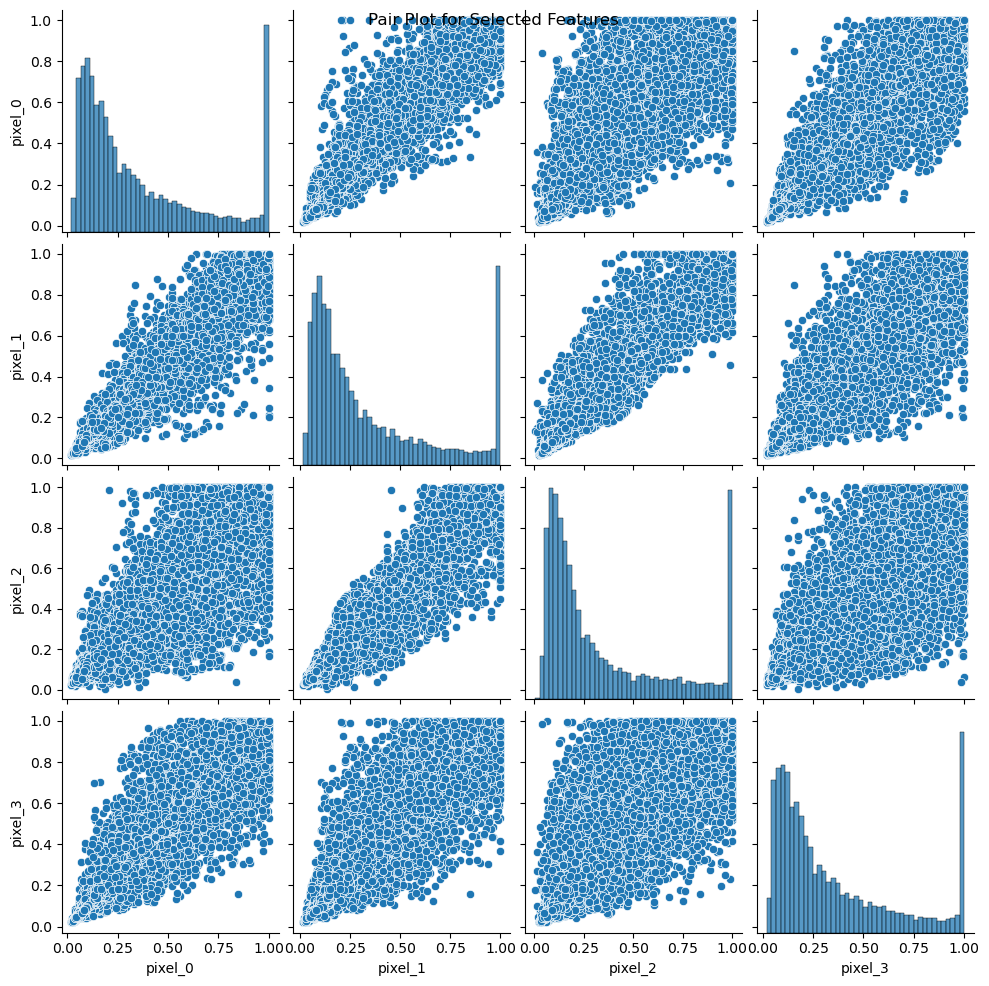

In [26]:
# Multivariate Exploration: Pair plot for multiple features
features_for_pairplot = ['pixel_0', 'pixel_1', 'pixel_2', 'pixel_3']  # Add more features as needed
sns.pairplot(train_df[features_for_pairplot])
plt.suptitle('Pair Plot for Selected Features')
plt.show()

**since the data is already preproccessed we wont need to preprocess the data**

## Model Building

#### From Scratch Model

In [27]:
# Define the model architecture
model = Sequential()

# Add the first convolutional layer with 32 filters, a 3x3 kernel, and ReLU activation
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))

# Add the second convolutional layer with 32 filters and a 3x3 kernel
model.add(Conv2D(32, (3, 3), activation='relu'))

# Add max pooling layer with a 2x2 pool size
model.add(MaxPool2D(pool_size=(2, 2)))

# Add the third convolutional layer with 64 filters and a 3x3 kernel
model.add(Conv2D(64, (3, 3), activation='relu'))

# Add the fourth convolutional layer with 64 filters and a 3x3 kernel
model.add(Conv2D(64, (3, 3), activation='relu'))

# Add max pooling layer with a 2x2 pool size
model.add(MaxPool2D(pool_size=(2, 2)))

# Flatten the output from the previous layer
model.add(Flatten())

# Add a fully connected layer with 512 units and ReLU activation
model.add(Dense(512, activation='relu'))

# Add a fully connected layer with 256 units and ReLU activation
model.add(Dense(256, activation='relu'))

# Add dropout layer with a rate of 0.2 to prevent overfitting
model.add(Dropout(0.2))

# Add the output layer with 43 units (corresponding to the number of traffic sign classes) and softmax activation
model.add(Dense(43, activation='softmax'))

# Compile the model with categorical crossentropy loss, Adam optimizer, and accuracy metric
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# Print the summary of the model architecture
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 32)        0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 12, 12, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 10, 10, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                   

In [28]:
# Train the model
epoch = 10
h = model.fit(trainX, trainY, verbose = 1, batch_size=64, epochs=epoch, validation_data=(validX, validY))
#one of the best baest batch size is 64

Epoch 1/10
544/544 [==============================] - 42s 75ms/step - loss: 0.8229 - accuracy: 0.7721 - val_loss: 0.3015 - val_accuracy: 0.9365
Epoch 2/10
544/544 [==============================] - 39s 72ms/step - loss: 0.0692 - accuracy: 0.9816 - val_loss: 0.1823 - val_accuracy: 0.9535
Epoch 3/10
544/544 [==============================] - 46s 84ms/step - loss: 0.0346 - accuracy: 0.9894 - val_loss: 0.2132 - val_accuracy: 0.9571
Epoch 4/10
544/544 [==============================] - 49s 89ms/step - loss: 0.0272 - accuracy: 0.9921 - val_loss: 0.1772 - val_accuracy: 0.9562
Epoch 5/10
544/544 [==============================] - 45s 82ms/step - loss: 0.0202 - accuracy: 0.9940 - val_loss: 0.1760 - val_accuracy: 0.9605
Epoch 6/10
544/544 [==============================] - 41s 75ms/step - loss: 0.0227 - accuracy: 0.9934 - val_loss: 0.1304 - val_accuracy: 0.9721
Epoch 7/10
544/544 [==============================] - 41s 75ms/step - loss: 0.0178 - accuracy: 0.9946 - val_loss: 0.1612 - val_accuracy:

In [29]:
#put labels in a dataframe for further analysis 
df = pd.read_csv("./dataset/label_names.csv")
df.head(10)


,ClassId,SignName
0,0,Speed limit (20km/h)
1,1,Speed limit (30km/h)
2,2,Speed limit (50km/h)
3,3,Speed limit (60km/h)
4,4,Speed limit (70km/h)
5,5,Speed limit (80km/h)
6,6,End of speed limit (80km/h)
7,7,Speed limit (100km/h)
8,8,Speed limit (120km/h)
9,9,No passing


In [30]:
#split the dataframe  features and labels
testX = test["features"]
testY = test["labels"]
testX = testX.astype("float") / 255.0
testY = to_categorical(testY)

In [31]:
#evaluate the model on the test set
model.evaluate(testX, testY) 
# [loss, accuracy]

395/395 [==============================] - 4s 9ms/step - loss: 0.2587 - accuracy: 0.9518


[0.2586762011051178, 0.9517814517021179]

In [32]:
#print all the labels
labels = np.asarray(df["SignName"])
print(labels)

['Speed limit (20km/h)' 'Speed limit (30km/h)' 'Speed limit (50km/h)'
 'Speed limit (60km/h)' 'Speed limit (70km/h)' 'Speed limit (80km/h)'
 'End of speed limit (80km/h)' 'Speed limit (100km/h)'
 'Speed limit (120km/h)' 'No passing'
 'No passing for vehicles over 3.5 metric tons'
 'Right-of-way at the next intersection' 'Priority road' 'Yield' 'Stop'
 'No vehicles' 'Vehicles over 3.5 metric tons prohibited' 'No entry'
 'General caution' 'Dangerous curve to the left'
 'Dangerous curve to the right' 'Double curve' 'Bumpy road'
 'Slippery road' 'Road narrows on the right' 'Road work' 'Traffic signals'
 'Pedestrians' 'Children crossing' 'Bicycles crossing'
 'Beware of ice/snow' 'Wild animals crossing'
 'End of all speed and passing limits' 'Turn right ahead'
 'Turn left ahead' 'Ahead only' 'Go straight or right'
 'Go straight or left' 'Keep right' 'Keep left' 'Roundabout mandatory'
 'End of no passing' 'End of no passing by vehicles over 3.5 metric tons']


In [33]:
#save the model file
model.save("traffic-cnn.h5")

C:\Users\youss\AppData\Roaming\Python\Python310\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1/1 [==============================] - 0s 128ms/step
prediction : [5] Speed limit (80km/h)
actual:  5 Speed limit (80km/h)


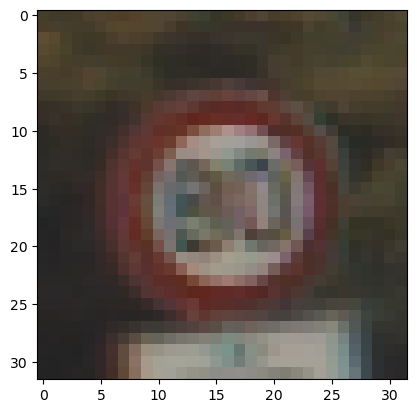

In [34]:
# test the model on a random image
# This code selects a random image from the test dataset, predicts its label using the first model (model),
# and compares the predicted label with the actual label. It then displays the image along with the prediction and actual label.
testIdx = np.random.randint(0, len(testX))
p = model.predict(testX[testIdx:testIdx+1])
idx = np.argmax(p, axis=1)
plt.imshow(testX[testIdx])
print("prediction :", idx, labels[idx][0])
print("actual: ",np.argmax(np.asarray(testY[testIdx])), labels[np.argmax(np.asarray(testY[testIdx]))])

#### Pretrained Model

##### Resnet 50 model with no weights

In [35]:
# Create ResNet50 model without pre-trained weights
resnet = ResNet50(weights=None, include_top=False, input_shape=(32, 32, 3))
# Get the output tensor from ResNet50
x = resnet.output
# Apply global average pooling to reduce spatial dimensions
x = GlobalAveragePooling2D()(x)
# Apply dropout regularization to prevent overfitting
x = Dropout(0.5)(x)
# Add a fully connected layer with softmax activation for 43 traffic sign classes
predictions = Dense(43, activation='softmax')(x)
# Create the final model by specifying the input and output tensors
model2 = Model(inputs=resnet.input, outputs=predictions)
# Model summary
model2.summary()


Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 32, 32, 3)]          0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 38, 38, 3)            0         ['input_1[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, 16, 16, 64)           9472      ['conv1_pad[0][0]']           
                                                                                                  
 conv1_bn (BatchNormalizati  (None, 16, 16, 64)           256       ['conv1_conv[0][0]']          
 on)                                                                                          

In [36]:
# Compile the model
model2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
# Train the model
epochs2 = 5
h2 =  model.fit(testX, testY,  batch_size = 32, epochs = epochs2, verbose = 1, validation_data = (validX, validY))


Epoch 1/5
395/395 [==============================] - 20s 50ms/step - loss: 0.0968 - accuracy: 0.9754 - val_loss: 0.1693 - val_accuracy: 0.9515
Epoch 2/5
395/395 [==============================] - 20s 50ms/step - loss: 0.0261 - accuracy: 0.9926 - val_loss: 0.1603 - val_accuracy: 0.9603
Epoch 3/5
395/395 [==============================] - 20s 50ms/step - loss: 0.0144 - accuracy: 0.9960 - val_loss: 0.1755 - val_accuracy: 0.9649
Epoch 4/5
395/395 [==============================] - 20s 52ms/step - loss: 0.0150 - accuracy: 0.9959 - val_loss: 0.1846 - val_accuracy: 0.9633
Epoch 5/5
395/395 [==============================] - 19s 49ms/step - loss: 0.0230 - accuracy: 0.9945 - val_loss: 0.2687 - val_accuracy: 0.9458


In [ ]:
#evaluate the model on the test set
model2.evaluate(testX, testY) 
# [loss, accuracy]

1/1 [==============================] - 0s 28ms/step
prediction : [35] Ahead only
actual:  31 Wild animals crossing


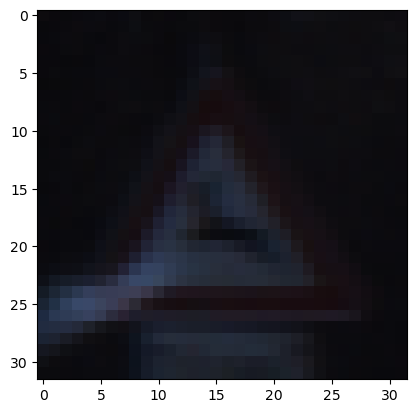

In [104]:
# test the model on a random image
# This code selects a random image from the test dataset, predicts its label using the second model (model2),
# and compares the predicted label with the actual label. It then displays the image along with the prediction and actual label.

testIdx2 = np.random.randint(0, len(testX))
p2 = model2.predict(testX[testIdx2:testIdx2+1])
idx2 = np.argmax(p2, axis=1)
plt.imshow(testX[testIdx2])
print("prediction :", idx2, labels[idx2][0])
print("actual: ",np.argmax(np.asarray(testY[testIdx2])), labels[np.argmax(np.asarray(testY[testIdx2]))])


## Evaluation

#### 1st Model

In [38]:
train_accuracy = h.history['accuracy'][-1]
print(f'Training Accuracy: {train_accuracy}')

train_loss = h.history['loss'][-1]
print(f'Training Loss: {train_loss}')



Training Accuracy: 0.996005654335022
Training Loss: 0.014146076515316963


In [39]:
val_accuracy = model.evaluate(validX, validY, verbose=1)[1]
print(f'Test Accuracy: {val_accuracy}')

val_loss = model.evaluate(validX, validY, verbose=1)[0]
print(f'validation Loss: {val_loss}')

138/138 [==============================] - 1s 9ms/step - loss: 0.2687 - accuracy: 0.9458
Test Accuracy: 0.945805013179779
138/138 [==============================] - 1s 9ms/step - loss: 0.2687 - accuracy: 0.9458
validation Loss: 0.2686871290206909


In [40]:
test_accuracy = model.evaluate(testX, testY, verbose=1)[1]
print(f'Test Accuracy: {test_accuracy}')

test_loss = model.evaluate(testX, testY, verbose=1)[0]
print(f'Test Loss: {test_loss}')

395/395 [==============================] - 4s 9ms/step - loss: 0.0423 - accuracy: 0.9892
Test Accuracy: 0.9891527891159058
395/395 [==============================] - 4s 9ms/step - loss: 0.0423 - accuracy: 0.9892
Test Loss: 0.04226493835449219


#### 2nd Model

In [41]:
train_accuracy2 = h2.history['accuracy'][-1]
print(f'Training Accuracy: {train_accuracy2}')

train_loss2 = h2.history['loss'][-1]
print(f'Training Loss: {train_loss2}')


Training Accuracy: 0.994536817073822
Training Loss: 0.023014383390545845


In [42]:
val_accuracy2 = model2.evaluate(validX, validY, verbose=1)[1]
print(f'Test Accuracy: {val_accuracy2}')

val_loss2 = model2.evaluate(validX, validY, verbose=1)[0]
print(f'validation Loss: {val_loss2}')

138/138 [==============================] - 10s 62ms/step - loss: 3.7586 - accuracy: 0.0283
Test Accuracy: 0.028344670310616493
138/138 [==============================] - 8s 62ms/step - loss: 3.7586 - accuracy: 0.0283
validation Loss: 3.7586026191711426


In [43]:
test_accuracy2 = model2.evaluate(testX, testY, verbose=1)[1]
print(f'Test Accuracy: {test_accuracy2}')

test_loss2 = model2.evaluate(testX, testY, verbose=1)[0]
print(f'Test Loss: {test_loss2}')

395/395 [==============================] - 26s 66ms/step - loss: 3.7587 - accuracy: 0.0315
Test Accuracy: 0.031512271612882614
395/395 [==============================] - 27s 67ms/step - loss: 3.7587 - accuracy: 0.0315
Test Loss: 3.758687973022461


the second model is over fitting on training and have very low accurcy on validation and testing 

the second model(pre-trained) compared to the first model(from scratch) plot


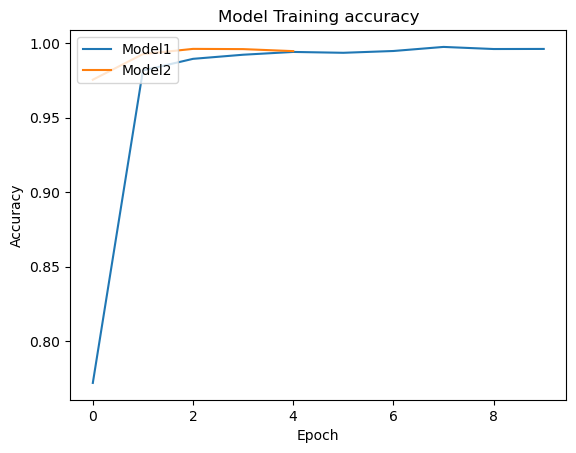

In [44]:
# Plot training & validation accuracy values between the two models
plt.plot(h.history['accuracy'])
plt.plot(h2.history['accuracy'])
plt.title('Model Training accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Model1', 'Model2'], loc='upper left')
plt.show()

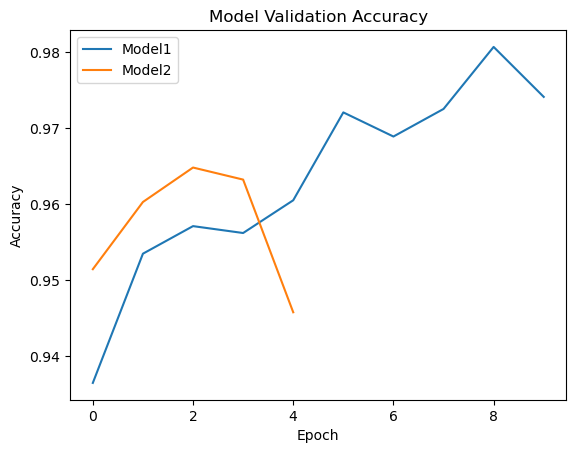

In [45]:
# Plot testing accuracy values between the two models
plt.plot(h.history['val_accuracy'])
plt.plot(h2.history['val_accuracy'])
plt.title('Model Validation Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Model1', 'Model2'], loc='upper left')
plt.show()
    

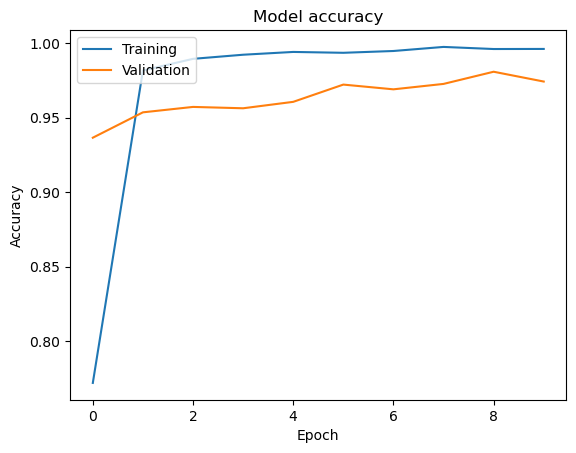

In [46]:
#plot the validation accuracy and epochs to the first model
plt.plot(h.history['accuracy'])
plt.plot(h.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper left')
plt.show()


In [62]:
# The output results in the form precision, recall, F1 score with respect to each class.
pred = np.argmax(model.predict(testX), axis=1)

print(classification_report(np.argmax(testY, axis=1), pred, target_names=labels))


395/395 [==============================] - 4s 9ms/step
                                                    precision    recall  f1-score   support

                              Speed limit (20km/h)       1.00      1.00      1.00        60
                              Speed limit (30km/h)       0.98      1.00      0.99       720
                              Speed limit (50km/h)       1.00      1.00      1.00       750
                              Speed limit (60km/h)       1.00      1.00      1.00       450
                              Speed limit (70km/h)       1.00      0.99      0.99       660
                              Speed limit (80km/h)       1.00      0.99      1.00       630
                       End of speed limit (80km/h)       0.99      0.99      0.99       150
                             Speed limit (100km/h)       1.00      0.98      0.99       450
                             Speed limit (120km/h)       0.99      0.99      0.99       450
                        

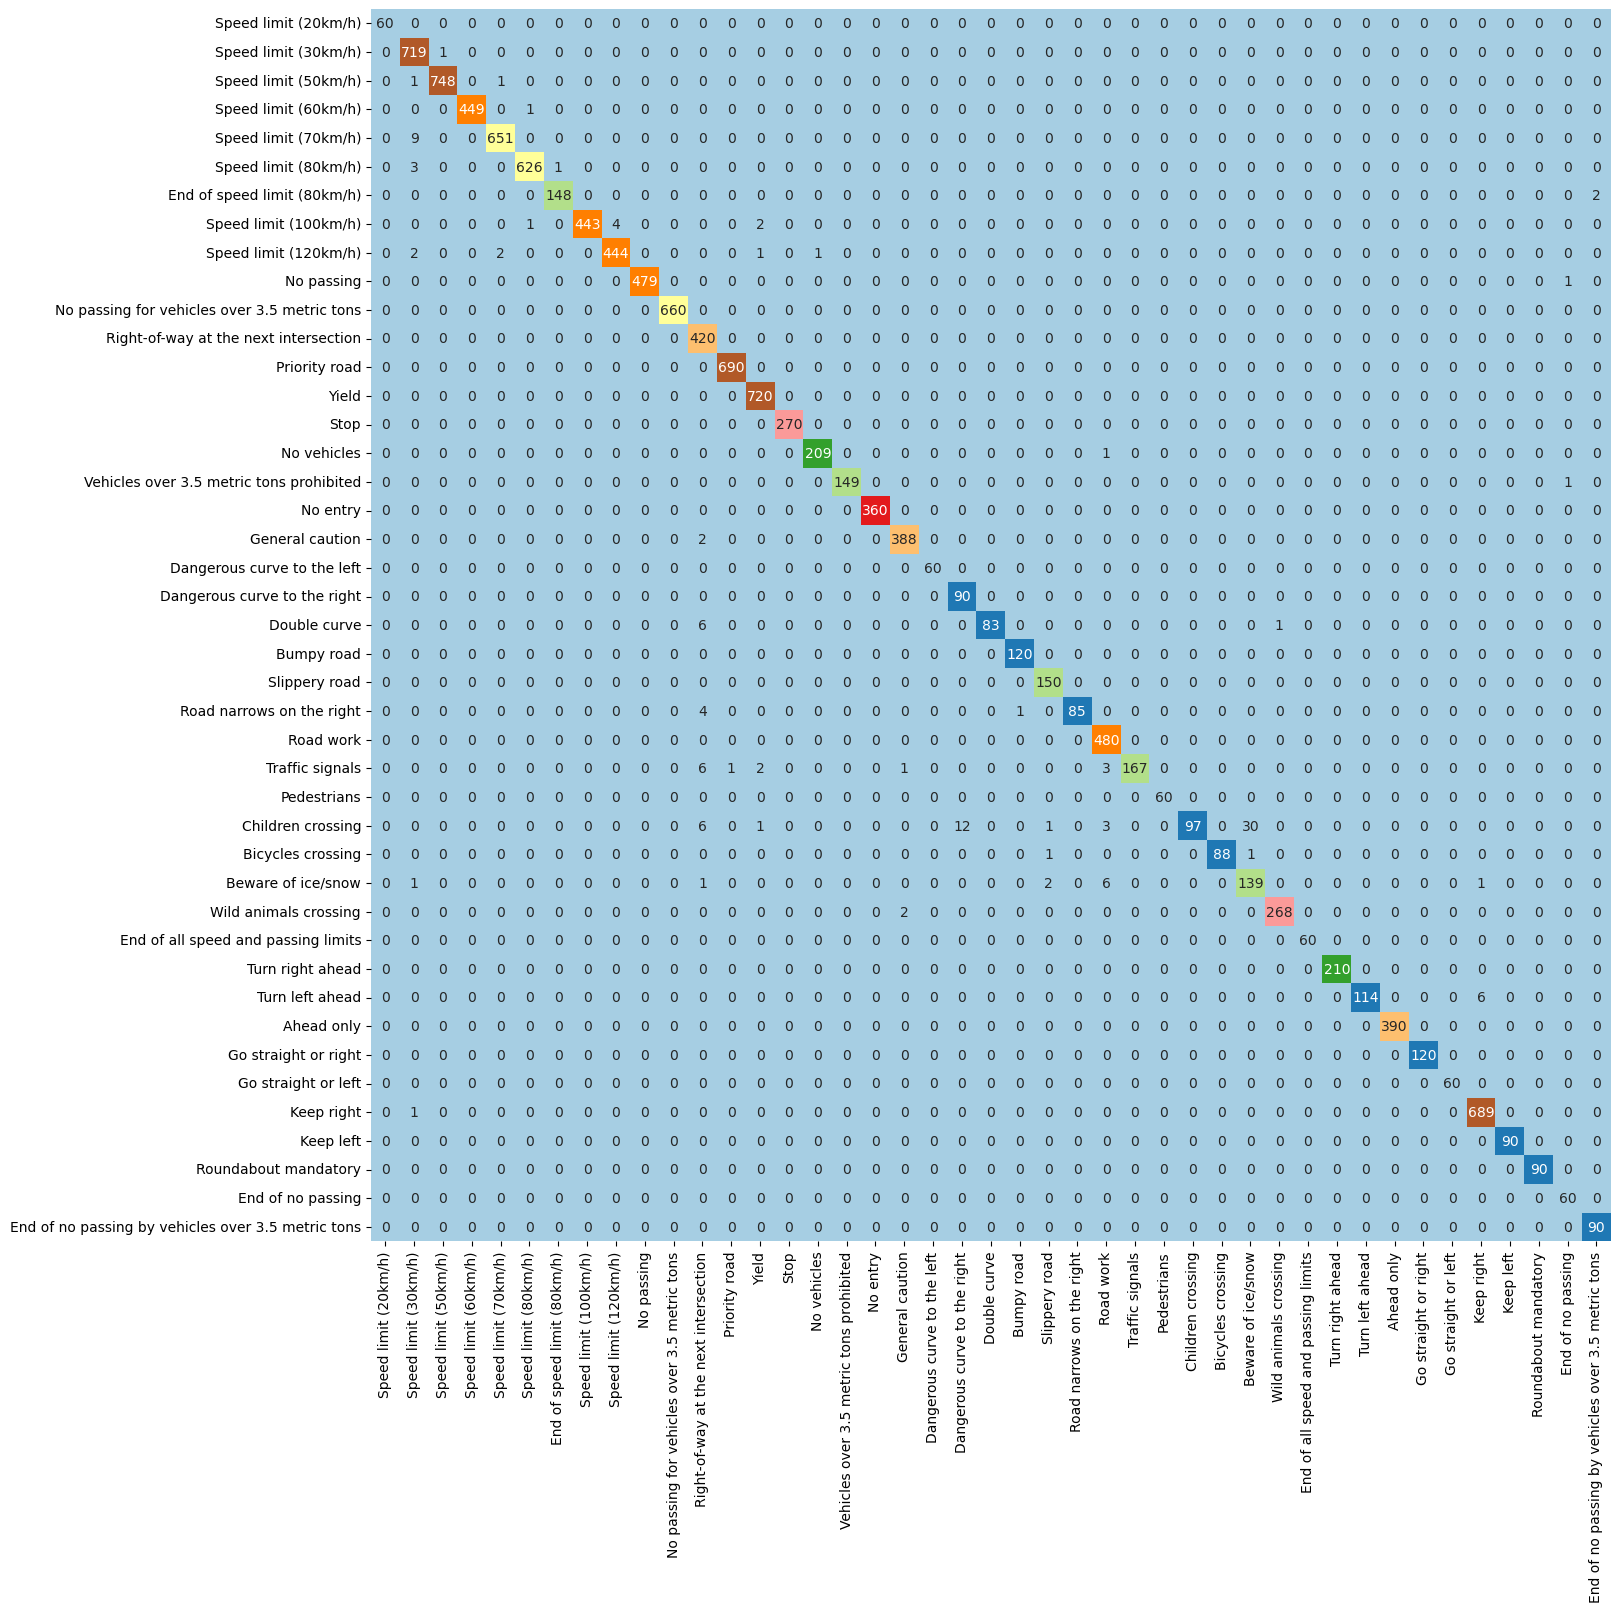

In [63]:
# The confusion matrix is used to describe the performance of the classification model.
cmat = confusion_matrix(np.argmax(testY, axis=1), pred)

plt.figure(figsize=(16,16))

sns.heatmap(cmat, annot = True, cbar = False, cmap='Paired', fmt="d", xticklabels=labels, yticklabels=labels);


In [74]:
# check the accuracy of each class in the dataset for first model 
classwise_acc = cmat.diagonal()/cmat.sum(axis=1) * 100 

cls_acc = pd.DataFrame({'Class_Label':[labels[i] for i in range(43)], 'Accuracy': classwise_acc.tolist()}, columns = ['Class_Label', 'Accuracy'])

cls_acc.style.format({"Accuracy": "{:,.2f}"}).bar(subset=["Accuracy"], color='green')


,Class_Label,Accuracy
0,Speed limit (20km/h),100.00
1,Speed limit (30km/h),99.86
2,Speed limit (50km/h),99.73
3,Speed limit (60km/h),99.78
4,Speed limit (70km/h),98.64
5,Speed limit (80km/h),99.37
6,End of speed limit (80km/h),98.67
7,Speed limit (100km/h),98.44
8,Speed limit (120km/h),98.67
9,No passing,99.79


In [105]:
# check the accuracy of each class in the dataset for the second model 
pred2 = np.argmax(model2.predict(testX), axis=1)
cmat2 = confusion_matrix(np.argmax(testY, axis=1), pred2)

classwise_acc2 = cmat2.diagonal()/cmat2.sum(axis=1) * 100 

cls_acc2 = pd.DataFrame({'Class_Label':[labels[i] for i in range(43)], 'Accuracy': classwise_acc2.tolist()}, columns = ['Class_Label', 'Accuracy'])

cls_acc2.style.format({"Accuracy": "{:,.2f}"}).bar(subset=["Accuracy"], color='green')


395/395 [==============================] - 24s 61ms/step


,Class_Label,Accuracy
0,Speed limit (20km/h),0.00
1,Speed limit (30km/h),0.00
2,Speed limit (50km/h),0.00
3,Speed limit (60km/h),0.00
4,Speed limit (70km/h),0.00
5,Speed limit (80km/h),0.00
6,End of speed limit (80km/h),0.00
7,Speed limit (100km/h),0.00
8,Speed limit (120km/h),0.00
9,No passing,0.00
